In [21]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

In [22]:
df = pd.read_csv("Data/ADANIPORTS.csv", index_col='Date', parse_dates=True)

In [23]:
df.dropna(inplace=True)

In [24]:
df.index

DatetimeIndex(['2018-09-24', '2018-09-25', '2018-09-26', '2018-09-27',
               '2018-09-28', '2018-10-01', '2018-10-03', '2018-10-04',
               '2018-10-05', '2018-10-08',
               ...
               '2023-09-08', '2023-09-11', '2023-09-12', '2023-09-13',
               '2023-09-14', '2023-09-15', '2023-09-18', '2023-09-20',
               '2023-09-21', '2023-09-22'],
              dtype='datetime64[ns]', name='Date', length=1236, freq=None)

In [25]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-09-24,364.350006,366.000000,338.500000,345.850006,334.923798,3415863
2018-09-25,345.100006,349.450012,324.299988,337.950012,327.273346,5028005
2018-09-26,340.500000,344.899994,330.600006,338.549988,327.854370,3424347
2018-09-27,338.549988,344.950012,330.149994,335.250000,324.658661,4896009
2018-09-28,335.250000,341.000000,326.500000,328.899994,318.509247,4653499


In [26]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

In [27]:
span = 12
alpha = 2/(span+1)

In [28]:
df['EMA12'] = df['Close'].ewm(alpha = alpha, adjust=False).mean()

In [43]:
df[['Close', 'EMA12']].head()

,Close,EMA12
Date,,
2018-09-24,345.850006,345.850006
2018-09-25,337.950012,344.634622
2018-09-26,338.549988,343.698525
2018-09-27,335.250000,342.398752
2018-09-28,328.899994,340.322020


In [30]:
model = SimpleExpSmoothing(df['Close'])

In [31]:
fitted_model = model.fit(smoothing_level=alpha, optimized=False)

In [32]:
df['SES12'] = fitted_model.fittedvalues.shift(-1)

In [33]:
df = df[['Close', 'EMA12', 'SES12']]

<Axes: xlabel='Date'>

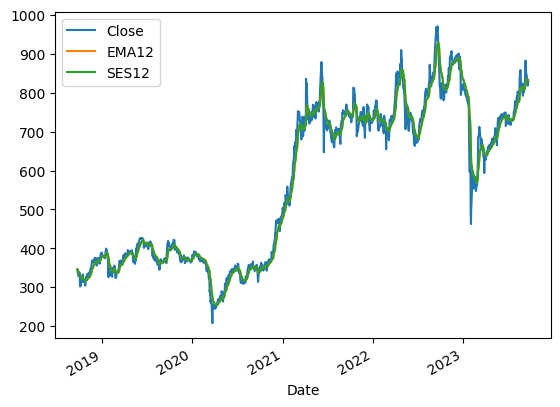

In [34]:
df.plot()

In [35]:
df['DES_add_12'] = ExponentialSmoothing(df['Close'], trend='add').fit().fittedvalues.shift(-1)

In [36]:
df.head()

,Close,EMA12,SES12,DES_add_12
Date,,,,
2018-09-24,345.850006,345.850006,345.850006,341.281033
2018-09-25,337.950012,344.634622,344.634622,333.311375
2018-09-26,338.549988,343.698525,343.698525,333.991988
2018-09-27,335.250000,342.398752,342.398752,330.741556
2018-09-28,328.899994,340.322020,340.322020,324.363639


<Axes: xlabel='Date'>

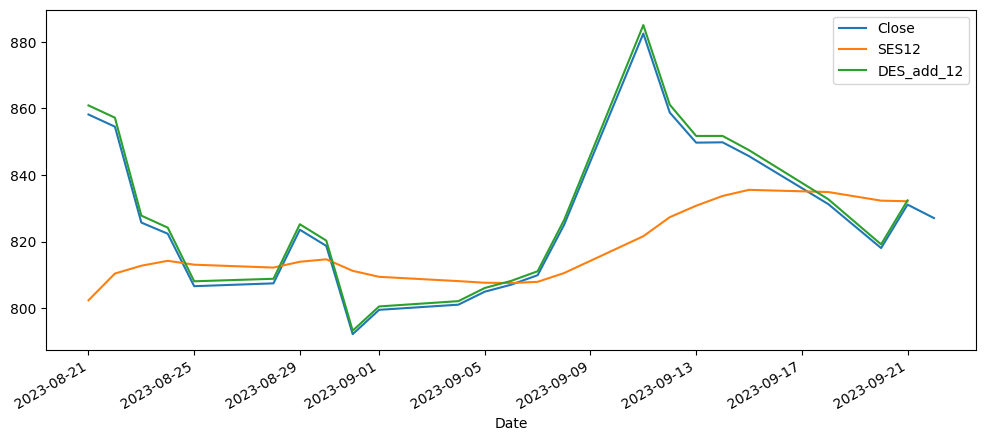

In [37]:
df[['Close', 'SES12', 'DES_add_12']].iloc[-24:].plot(figsize=(12,5))

In [38]:
df['DES_mul_12'] = ExponentialSmoothing(df['Close'], trend='mul').fit().fittedvalues.shift(-1)

<Axes: xlabel='Date'>

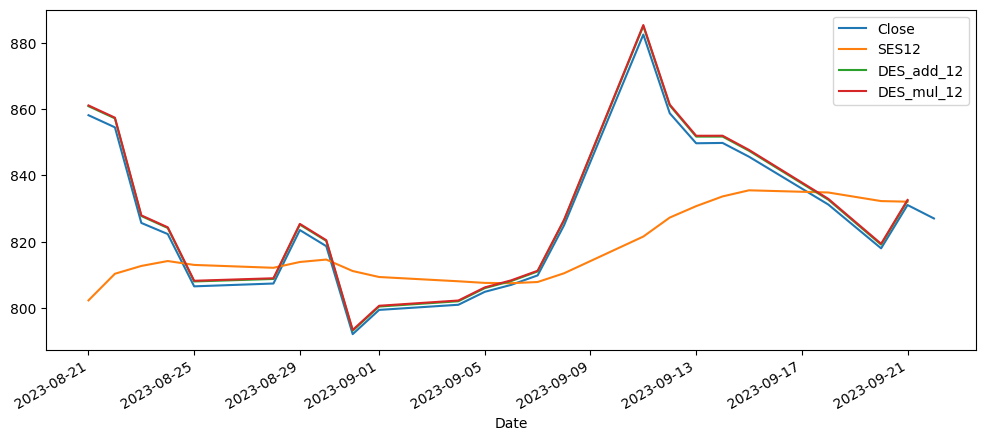

In [39]:
df[['Close', 'SES12', 'DES_add_12', "DES_mul_12"]].iloc[-24:].plot(figsize=(12,5))

In [40]:
df['TES_mul_12'] = ExponentialSmoothing(df['Close'], trend='mul', seasonal='mul', seasonal_periods=12).fit().fittedvalues

In [44]:
df.head()

,Close,EMA12,SES12,DES_add_12,DES_mul_12,TES_mul_12
Date,,,,,,
2018-09-24,345.850006,345.850006,345.850006,341.281033,345.799825,337.226908
2018-09-25,337.950012,344.634622,344.634622,333.311375,337.755534,347.413885
2018-09-26,338.549988,343.698525,343.698525,333.991988,338.333128,341.029569
2018-09-27,335.250000,342.398752,342.398752,330.741556,334.987819,337.239521
2018-09-28,328.899994,340.322020,340.322020,324.363639,328.529713,333.949630


<Axes: xlabel='Date'>

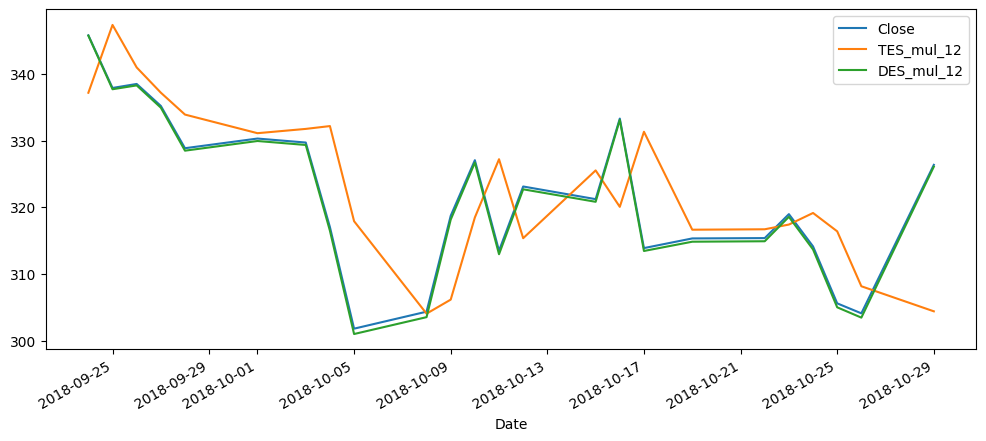

In [42]:
df[['Close', "TES_mul_12", "DES_mul_12"]][:24].plot(figsize=(12,5))